In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel(r'D:\\Etda_works\\Superstore.xlsx', sheet_name = 'Superstore')
print(df)

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson 

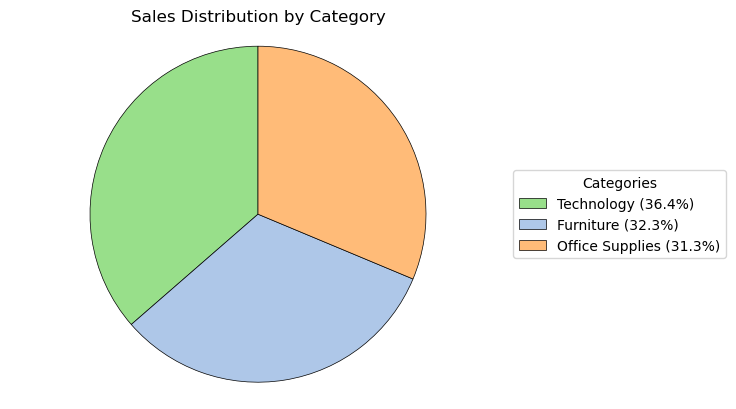

In [4]:
#Category Pie Chart
sales_by_category = df.groupby('Category').agg({'Sales': 'sum'}).reset_index()
sales_by_category = sales_by_category.sort_values(by='Sales', ascending=False)
base_colors = {
    'Furniture': '#aec7e8',
    'Technology': '#98df8a', 
    'Office Supplies': '#ffbb78', 
    'Others': '#ff9896', 
}
colors = [base_colors.get(category, '#c2c2c2') for category in sales_by_category['Category']]
plt.pie(
    sales_by_category['Sales'], 
    labels=None,  
    autopct=None,
    startangle=90, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}
)
plt.legend(
    [f"{row['Category']} ({row['Sales'] / sales_by_category['Sales'].sum() * 100:.1f}%)" for _, row in sales_by_category.iterrows()],
    title="Categories",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)
plt.title('Sales Distribution by Category')
plt.axis('equal')
plt.show()

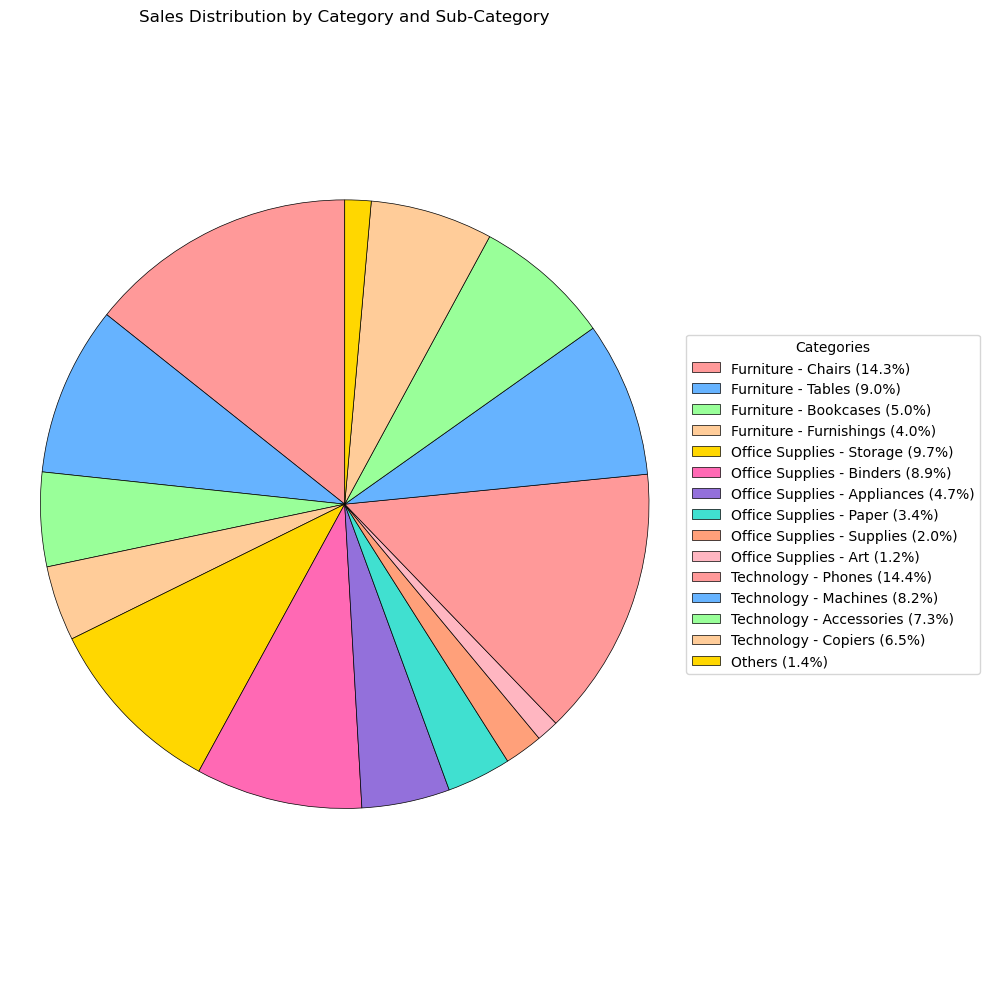

In [5]:
#Sub-Category pie graph
sales_by_category_subcategory = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
total_sales = sales_by_category_subcategory['Sales'].sum()
sales_by_category_subcategory['Percentage'] = (sales_by_category_subcategory['Sales'] / total_sales) * 100
sales_by_category_subcategory['Label'] = sales_by_category_subcategory.apply(
    lambda row: f"{row['Category']} - {row['Sub-Category']} ({row['Percentage']:.1f}%)" if row['Percentage'] >= 0.9 else 'Others', axis=1
)
sales_by_category_subcategory['Category'] = sales_by_category_subcategory['Label'].apply(lambda x: x.split(' - ')[0])
sales_by_category_subcategory['Sub-Category'] = sales_by_category_subcategory['Label'].apply(lambda x: x.split(' - ')[1] if ' - ' in x else '')
sales_by_category_subcategory = sales_by_category_subcategory.sort_values(by=['Category', 'Sales'], ascending=[True, False])
others_row = sales_by_category_subcategory[sales_by_category_subcategory['Label'] == 'Others']
non_others = sales_by_category_subcategory[sales_by_category_subcategory['Label'] != 'Others']
others_combined = others_row.groupby('Category').agg({'Sales': 'sum'}).reset_index()
others_combined['Label'] = 'Others'
sorted_sales = pd.concat([non_others, others_combined])

plt.figure(figsize=(10, 10))

# Custom vibrant colors excluding browns, grays, and blacks
custom_colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#FF69B4', '#9370DB', '#40E0D0', '#FFA07A', '#FFB6C1']

wedges, texts = plt.pie(
    sorted_sales['Sales'], 
    labels=None,  
    autopct=None,  
    startangle=90, 
    colors=custom_colors[:len(sorted_sales)],  
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}  
)

legend_labels = [
    f"{label} ({sales / total_sales * 100:.1f}%)" if label == 'Others' else f"{label}"
    for label, sales in zip(sorted_sales['Label'], sorted_sales['Sales'])
]

plt.legend(wedges, legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Sales Distribution by Category and Sub-Category')
plt.axis('equal')  
plt.tight_layout()
plt.show()


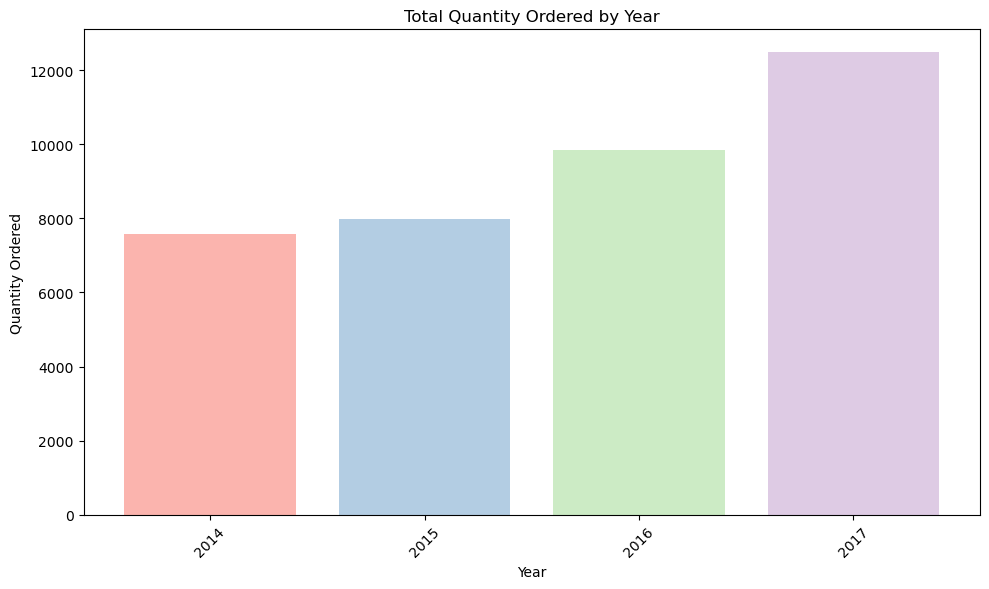

In [6]:
#Order by year graph
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
yearly_orders = df.groupby('Year')['Quantity'].sum().reset_index()
colors = plt.cm.Pastel1(range(len(yearly_orders)))
plt.figure(figsize=(10,6))
plt.bar(yearly_orders['Year'], yearly_orders['Quantity'], color=colors)
plt.title('Total Quantity Ordered by Year')
plt.xlabel('Year')
plt.ylabel('Quantity Ordered')
plt.xticks(yearly_orders['Year'], rotation=45)
plt.tight_layout()
plt.show()

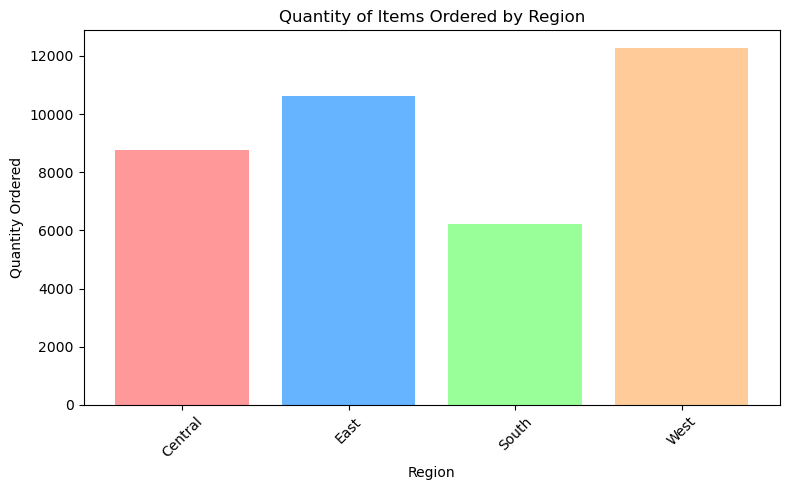

In [7]:
#Ordered by region graph
region_orders = df.groupby('Region')['Quantity'].sum().reset_index()
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']
plt.figure(figsize=(8,5))
plt.bar(region_orders['Region'], region_orders['Quantity'], color=colors)
plt.title('Quantity of Items Ordered by Region')
plt.xlabel('Region')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

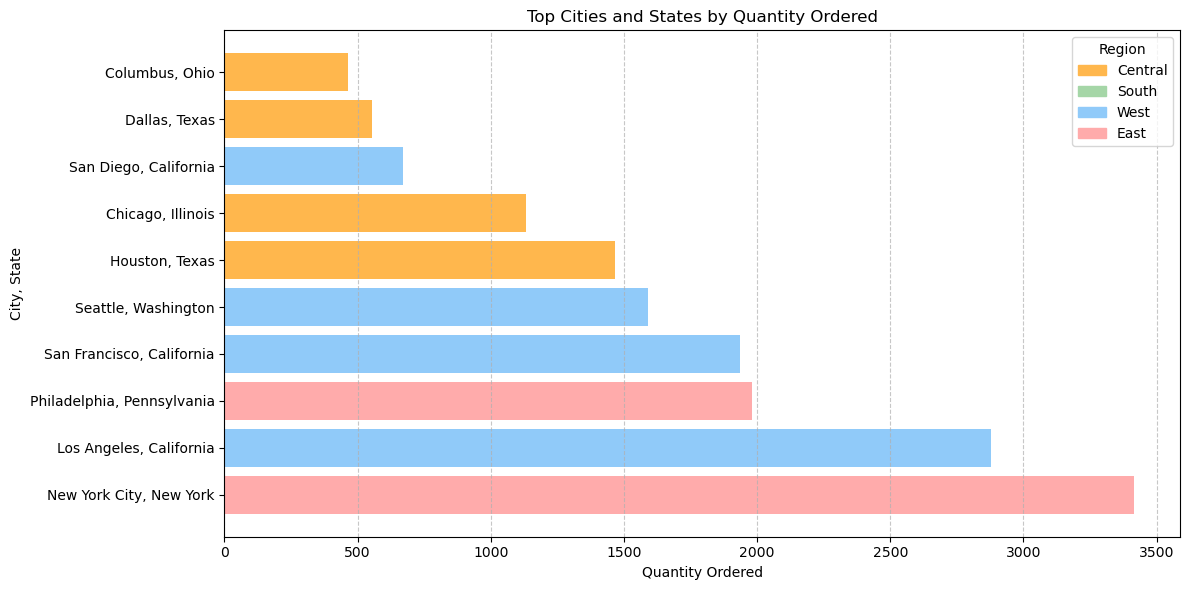

In [8]:
#State,Region,City graph
state_city_orders = df.groupby(['State', 'City'])['Quantity'].sum().reset_index()
top_states_cities = state_city_orders.sort_values(by='Quantity', ascending=False).head(10)
state_region_mapping = {
    'Texas': ('Central', '#FFB74D'),
    'Illinois': ('Central', '#FFB74D'),
    'Ohio': ('Central', '#FFB74D'),
    'Washington': ('West', '#90CAF9'),
    'California': ('West', '#90CAF9'),
    'New York': ('East', '#FFABAB'),
    'Pennsylvania': ('East', '#FFABAB'),
}
top_states_cities[['Region', 'Color']] = top_states_cities['State'].map(state_region_mapping).apply(pd.Series)
plt.figure(figsize=(12, 6))
plt.barh(top_states_cities['City'] + ', ' + top_states_cities['State'], 
         top_states_cities['Quantity'], 
         color=top_states_cities['Color'])

plt.title('Top Cities and States by Quantity Ordered', fontsize=12)
plt.xlabel('Quantity Ordered', fontsize=10)
plt.ylabel('City, State', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
all_regions = ['Central', 'South', 'West', 'East']
region_colors = {
    'Central': '#FFB74D',
    'South': '#A5D6A7',
    'West': '#90CAF9',
    'East': '#FFABAB',
}
handles = [plt.Rectangle((0, 0), 1, 1, color=region_colors[region]) for region in all_regions]
plt.legend(handles, all_regions, title="Region", loc='upper right')
plt.tight_layout()
plt.show()

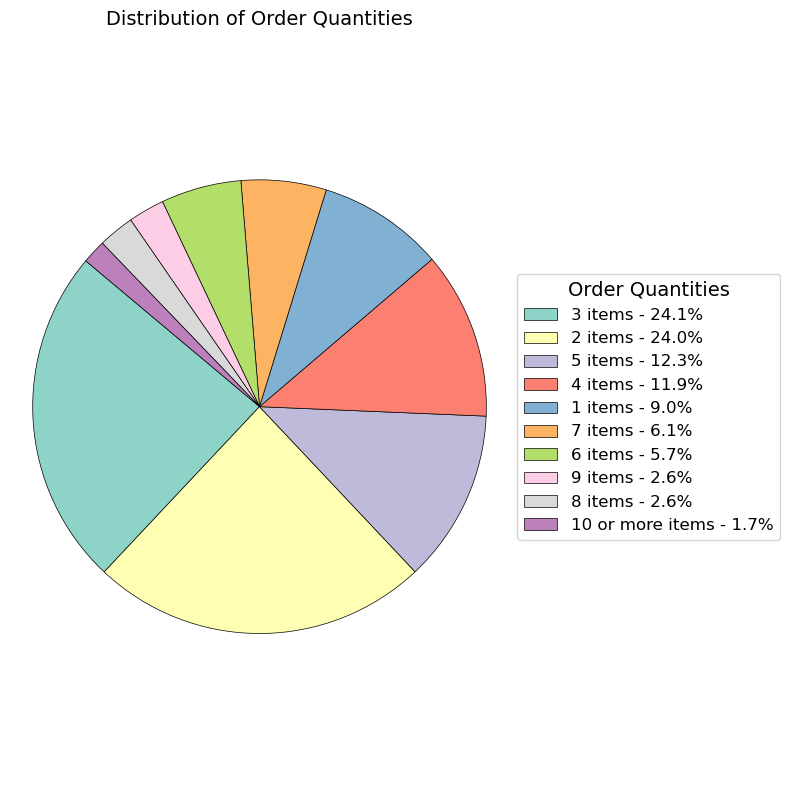

In [9]:
#Quantity bought
quantity_distribution = df['Quantity'].value_counts().reset_index()
quantity_distribution.columns = ['Quantity', 'Count']
quantity_distribution['Quantity'] = quantity_distribution['Quantity'].apply(lambda x: '10 or more' if x >= 10 else x)
quantity_distribution = quantity_distribution.groupby('Quantity')['Count'].sum().reset_index()
quantity_distribution = quantity_distribution.sort_values(by='Count', ascending=False)
quantity_distribution['Percentage'] = (quantity_distribution['Count'] / quantity_distribution['Count'].sum()) * 100
legend_labels = [f'{qty} items - {pct:.1f}%' for qty, pct in zip(quantity_distribution['Quantity'], quantity_distribution['Percentage'])]
plt.figure(figsize=(8, 8))
plt.pie(quantity_distribution['Count'], 
        startangle=140, 
        colors=plt.cm.Set3(range(len(quantity_distribution))), 
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})  # Thinner outline
plt.legend(legend_labels, title="Order Quantities", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12, title_fontsize=14)
plt.title('Distribution of Order Quantities', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

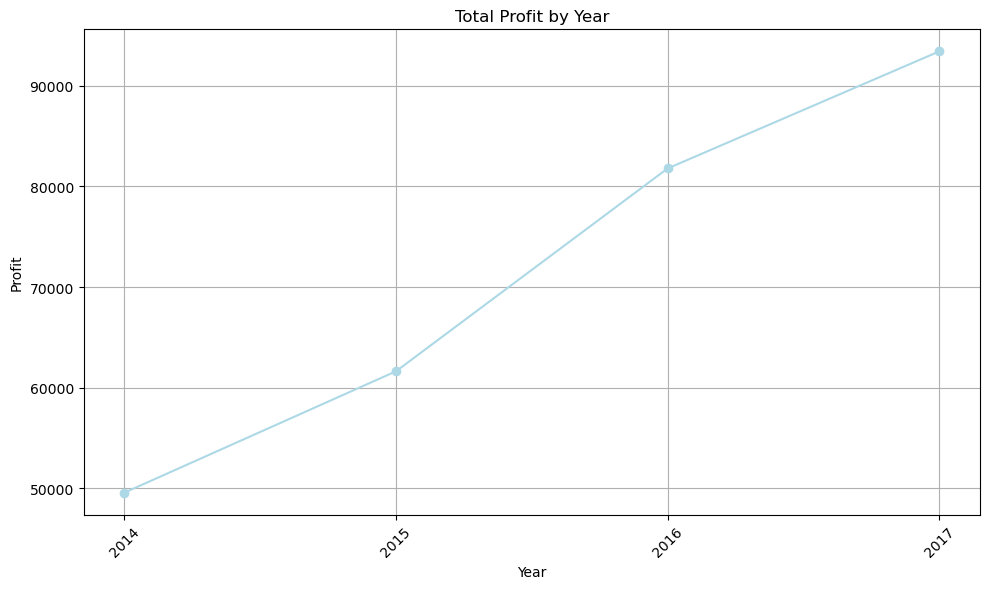

In [10]:
#Profit thru years
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
yearly_profit = df.groupby('Year')['Profit'].sum().reset_index()
plt.figure(figsize=(10,6))
plt.plot(yearly_profit['Year'], yearly_profit['Profit'], marker='o', color='lightblue', linestyle='-')
plt.title('Total Profit by Year')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.xticks(yearly_profit['Year'], rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

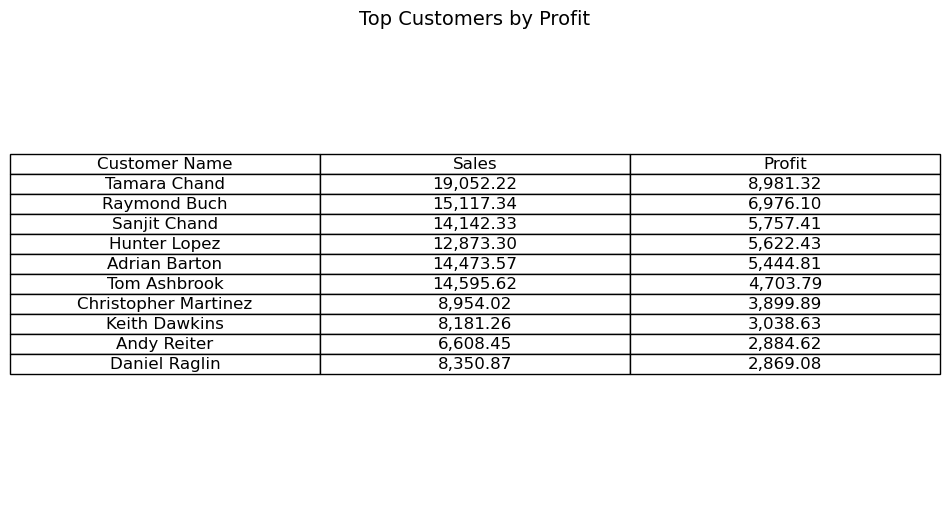

In [11]:
customer_profit = df.groupby('Customer Name').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
top_customers = customer_profit.sort_values(by='Profit', ascending=False).head(10)
top_customers['Sales'] = top_customers['Sales'].map('{:,.2f}'.format)
top_customers['Profit'] = top_customers['Profit'].map('{:,.2f}'.format)
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=top_customers.values, colLabels=top_customers.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.title('Top Customers by Profit', fontsize=14)
plt.show()

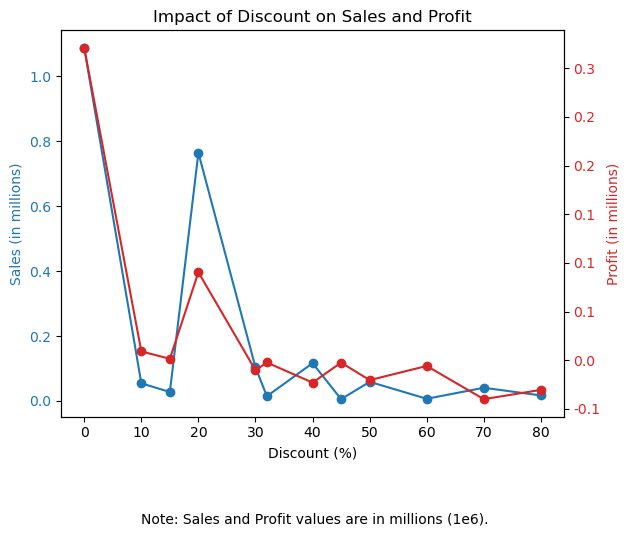

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = pd.read_excel(r'D:\\Etda_works\\Superstore.xlsx', sheet_name = 'Superstore')
grouped_data = df.groupby('Discount').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
fig, ax1 = plt.subplots()

ax1.set_xlabel('Discount (%)')
ax1.set_ylabel('Sales (in millions)', color='tab:blue')
ax1.plot(grouped_data['Discount'] * 100, grouped_data['Sales'], color='tab:blue', marker='o', label='Sales')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}'))

ax2 = ax1.twinx()
ax2.set_ylabel('Profit (in millions)', color='tab:red')
ax2.plot(grouped_data['Discount'] * 100, grouped_data['Profit'], color='tab:red', marker='o', label='Profit')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}'))

plt.title('Impact of Discount on Sales and Profit')
fig.tight_layout()
plt.figtext(0.5, -0.1, "Note: Sales and Profit values are in millions (1e6).", wrap=True, horizontalalignment='center', fontsize=10)

plt.show()


In [3]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
snapshot_date = df['Order Date'].max() + pd.Timedelta(days=1)

rfm = df.groupby(['Customer ID', 'Customer Name']).agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days,
    'Order ID': 'nunique',
    'Sales': 'sum'
}).reset_index()

rfm.columns = ['Customer ID', 'Customer Name', 'Recency', 'Frequency', 'Monetary']

rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

top_rfm = rfm[['Customer ID', 'Customer Name', 'RFM_Score']].sort_values(by='RFM_Score', ascending=False).head(10)

print(top_rfm.to_string(index=False, justify='center'))


Customer ID  Customer Name  RFM_Score
  BF-11170       Ben Ferrer    444   
  BB-11545    Brenda Bowman    444   
  RB-19465     Rick Bensley    444   
  MH-18115   Mick Hernandez    444   
  PO-18850  Patrick O'Brill    444   
  AT-10735    Annie Thurman    444   
  MM-17920    Michael Moore    444   
  CC-12220     Chris Cortes    444   
  TC-21295    Toby Carlisle    444   
  AH-10210       Alan Hwang    444   


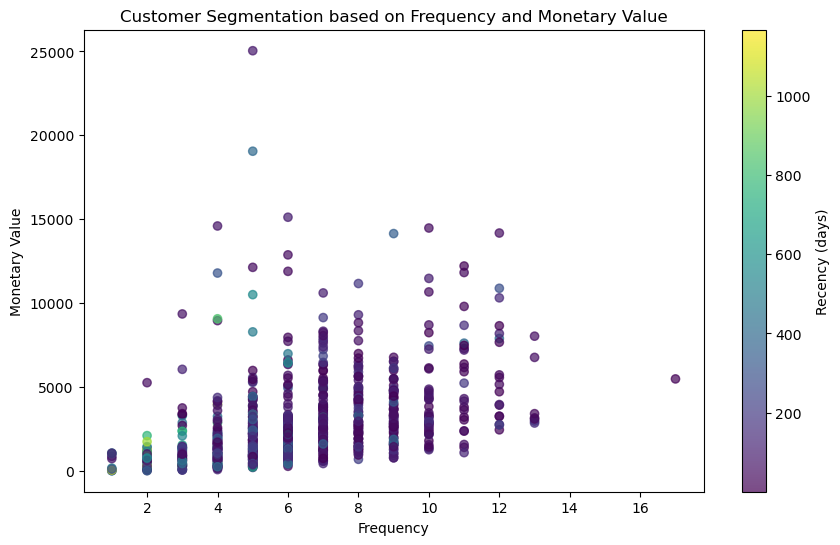

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
scatter = plt.scatter(rfm['Frequency'], rfm['Monetary'], c=rfm['Recency'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Recency (days)')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.title('Customer Segmentation based on Frequency and Monetary Value')
plt.show()
